In [ ]:
#mounting google drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
#import needed libraries
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 
import plotly.express as px 
from glob import glob 
import os 
import re

**Data Loading**

In [ ]:
# engagement_data.csv

from glob import glob
path='/content/drive/Shareddrives/E-Learning/Data/engagement_data'
all_files = glob(path+'/*.csv')
li=[]

for filename in all_files:
  df=pd.read_csv(filename, index_col=None, header=0)
  district_id=filename.split('/')[7].split('.')[0]
  df['district_id']=district_id
  li.append(df)

engagement_df=pd.concat(li)
engagement_df=engagement_df.reset_index(drop=True)
engagement_df.head(10)

,time,lp_id,pct_access,engagement_index,district_id
0,2020-01-30,41150.0,0.04,1.64,1179
1,2020-01-30,39299.0,0.04,1.23,1179
2,2020-01-30,75088.0,0.04,0.41,1179
3,2020-01-30,49369.0,0.21,4.11,1179
4,2020-01-30,71775.0,0.04,0.82,1179
5,2020-01-30,75612.0,0.04,0.41,1179
6,2020-01-30,30036.0,0.04,1.23,1179
7,2020-01-30,72758.0,3.99,218.75,1179
8,2020-01-30,52615.0,0.00,NaN,1179
9,2020-01-30,55589.0,2.75,205.59,1179


In [ ]:
# districts_info.csv with data splitted for each column

#https://www.kaggle.com/filo12guda/learnplatform-covid-19-impact-on-digital-learning
#restructuring the csv file, was unable to delete the NaN rows
import re
district_general_df = pd.read_csv('/content/drive/Shareddrives/E-Learning/Data/districts_info.csv')

#renaming the columns
district_general_df.columns = ["district_id","state","locale","black-hispanic","reduce-free","ratio","pp-total"]

#first, take out the special characters '['
re_pat = re.compile(r'[/[]')
district_general_df["black-hispanic"] = district_general_df["black-hispanic"].str.replace(re_pat, '', regex=True)
district_general_df["reduce-free"] = district_general_df["reduce-free"].str.replace(re_pat, '', regex=True)
district_general_df["ratio"] = district_general_df["ratio"].str.replace(re_pat, '', regex=True)
district_general_df["pp-total"] = district_general_df["pp-total"].str.replace(re_pat, '', regex=True)

#then split each of those columns by min and max
district_general_df[['bh-min', 'bh-max']] = district_general_df['black-hispanic'].str.split(',', 1,expand=True)
district_general_df[['rf-min', 'rf-max']] = district_general_df['reduce-free'].str.split(',', 1,expand=True)
district_general_df[['rat-min', 'rat-max']] = district_general_df['ratio'].str.split(',', 1,expand=True)
district_general_df[['pp-min', 'pp-max']] = district_general_df['pp-total'].str.split(',', 1,expand=True)

#remove old columns
district_general_df = district_general_df.drop(["black-hispanic","reduce-free","ratio","pp-total"],axis=1)

#Transform the data type from string to float.
district_general_df[["bh-min","bh-max",'rf-min', 'rf-max','rat-min', 'rat-max','pp-min', 'pp-max']] = district_general_df[["bh-min","bh-max",'rf-min', 'rf-max','rat-min', 'rat-max','pp-min', 'pp-max']].astype(float).round(4)

district_general_df.head()

,district_id,state,locale,bh-min,bh-max,rf-min,rf-max,rat-min,rat-max,pp-min,pp-max
0,8815,Illinois,Suburb,0.0,0.2,0.0,0.2,0.18,1.0,14000.0,16000.0
1,2685,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,4921,Utah,Suburb,0.0,0.2,0.2,0.4,0.18,1.0,6000.0,8000.0
3,3188,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2238,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
 ## products_info.csv
products_info=pd.read_csv('/content/drive/Shareddrives/E-Learning/Data/products_info.csv')
products_info.head()

,LP ID,URL,Product Name,Provider/Company Name,Sector(s),Primary Essential Function
0,13117,https://www.splashmath.com,SplashLearn,StudyPad Inc.,PreK-12,LC - Digital Learning Platforms
1,66933,https://abcmouse.com,ABCmouse.com,"Age of Learning, Inc",PreK-12,LC - Digital Learning Platforms
2,50479,https://www.abcya.com,ABCya!,"ABCya.com, LLC",PreK-12,"LC - Sites, Resources & Reference - Games & Si..."
3,92993,http://www.aleks.com/,ALEKS,McGraw-Hill PreK-12,PreK-12; Higher Ed,LC - Digital Learning Platforms
4,73104,https://www.achieve3000.com/,Achieve3000,Achieve3000,PreK-12,LC - Digital Learning Platforms


**Preprocessing**

In [ ]:
#changing the type of district_id(int) to match them with the engagement_df district_id(str)

district_general_df['district_id']=district_general_df.astype('str')
district_general_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 233 entries, 0 to 232
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   district_id  233 non-null    object 
 1   state        176 non-null    object 
 2   locale       176 non-null    object 
 3   bh-min       176 non-null    float64
 4   bh-max       176 non-null    float64
 5   rf-min       148 non-null    float64
 6   rf-max       148 non-null    float64
 7   rat-min      162 non-null    float64
 8   rat-max      162 non-null    float64
 9   pp-min       118 non-null    float64
 10  pp-max       118 non-null    float64
dtypes: float64(8), object(3)
memory usage: 20.1+ KB


In [ ]:
#changing the coloumn name: LP ID to lp_id
products_info=products_info.rename(columns={'LP ID':'lp_id'})
# lower the capitalized column names
new_col_name=[]
for i in products_info.columns:
  new_col_name.append(i.lower())
products_info.columns=new_col_name

products_info.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 372 entries, 0 to 371
Data columns (total 6 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   lp_id                       372 non-null    int64 
 1   url                         372 non-null    object
 2   product name                372 non-null    object
 3   provider/company name       371 non-null    object
 4   sector(s)                   352 non-null    object
 5   primary essential function  352 non-null    object
dtypes: int64(1), object(5)
memory usage: 17.6+ KB


In [ ]:
district_general_df.sort_values(by='district_id',inplace=True)
district_general_df.head()
district_general_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 233 entries, 111 to 212
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   district_id  233 non-null    object 
 1   state        176 non-null    object 
 2   locale       176 non-null    object 
 3   bh-min       176 non-null    float64
 4   bh-max       176 non-null    float64
 5   rf-min       148 non-null    float64
 6   rf-max       148 non-null    float64
 7   rat-min      162 non-null    float64
 8   rat-max      162 non-null    float64
 9   pp-min       118 non-null    float64
 10  pp-max       118 non-null    float64
dtypes: float64(8), object(3)
memory usage: 21.8+ KB


In [ ]:
# One Hot Encoding of the locale (went through this process to use it for the regression analysis)
locale_dummies=pd.get_dummies(district_general_df['locale'])

In [ ]:
district_general_df=pd.concat([district_general_df,locale_dummies],axis=1)
district_general_df.head()

,district_id,state,locale,bh-min,bh-max,rf-min,rf-max,rat-min,rat-max,pp-min,pp-max,City,Rural,Suburb,Town
111,1000,Connecticut,Suburb,0.6,0.8,0.2,0.4,0.18,1.0,NaN,NaN,0,0,1,0
164,1039,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0
10,1044,Missouri,Suburb,0.0,0.2,0.0,0.2,NaN,NaN,10000.0,12000.0,0,0,1,0
147,1052,Illinois,Suburb,0.2,0.4,0.2,0.4,0.18,1.0,16000.0,18000.0,0,0,1,0
29,1131,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0


**new_file**

 dropped districts that had null data for every column

In [ ]:
#Removing null from here
col_lst= [ "bh-min", "bh-max", "rf-min", "rf-max", "rat-min", "rat-max", "pp-min", "pp-max"]
new_file=district_general_df.dropna(axis = 0, subset = col_lst, how = 'all')

In [ ]:
new_set=set(new_file['district_id'].unique())
original_set=set(district_general_df['district_id'].unique())

In [ ]:
deleted_districts=list(original_set-new_set)

**engagement_df**

only includes districts that have at least one data info about the school districts

In [ ]:
from glob import glob
path='/content/drive/Shareddrives/E-Learning/Data/engagement_data'
all_files = glob(path+'/*.csv')
li=[]

for filename in all_files:
  district_id=filename.split('/')[7].split('.')[0] 
  if district_id not in deleted_districts:
    df=pd.read_csv(filename, index_col=None, header=0)
    df['district_id']=district_id
    li.append(df)

engagement_df=pd.concat(li)
engagement_df=engagement_df.reset_index(drop=True)
engagement_df.head(10)

,time,lp_id,pct_access,engagement_index,district_id
0,2020-01-01,28525.0,0.05,0.47,1324
1,2020-01-01,83862.0,0.00,NaN,1324
2,2020-01-01,85836.0,0.00,NaN,1324
3,2020-01-01,57343.0,0.00,NaN,1324
4,2020-01-01,91165.0,0.00,NaN,1324
5,2020-01-01,77666.0,0.00,NaN,1324
6,2020-01-01,84217.0,0.00,NaN,1324
7,2020-01-01,69827.0,0.66,16.97,1324
8,2020-01-01,61441.0,0.09,0.94,1324
9,2020-01-01,64948.0,0.09,1.89,1324


In [ ]:
engagement_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17435744 entries, 0 to 17435743
Data columns (total 6 columns):
 #   Column            Dtype  
---  ------            -----  
 0   time              object 
 1   lp_id             float64
 2   pct_access        float64
 3   engagement_index  float64
 4   district_id       object 
 5   MM                int64  
dtypes: float64(3), int64(1), object(2)
memory usage: 798.1+ MB


In [ ]:
# now link these lo_id to the product info and make a new df
# find out what kind of products they are

what we need to do:

connect lp_id with product name, primary essential function, provider name, price(crawling, or manual research)
Q: 
-do the top 15 districts use the same/ similar products? 
-Are the products used by the top 15 districts different from the bottom 15 districts?

A:
use engagement_df column:engagement index to figure out which lp_id have big participation rate
products_info to connect it with other info

Hypothesis about the product:

the good ones(effective, easy) ones are expensive whereas the ineffective and hard to use ones are cheap or free 
less funded school districts would be using the free/cheap ones, not able to decide on what product to use.. and the students would suffer from degradation of class quality


trying to understand why this trend occured
this trend:
top 10% districts used fewer products than the bottom 10% district


**Analysis**



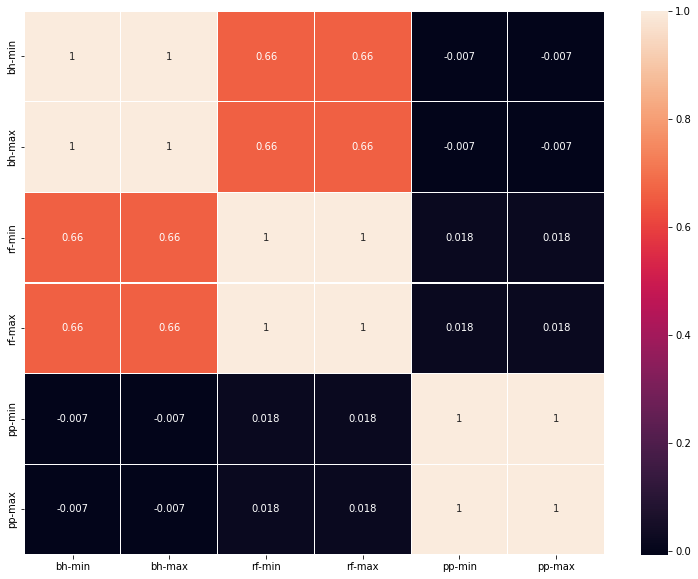

In [ ]:
#checking for the correlation between the independent variables

plt.figure(figsize=(13,10))
new_file_corr=new_file.copy()
new_file_corr.drop(['district_id','rat-min','rat-max','City', 'Rural','Suburb', 'Town'],axis=1,inplace=True)
sns.heatmap(new_file_corr.corr(),annot=True,linewidths=0.1)

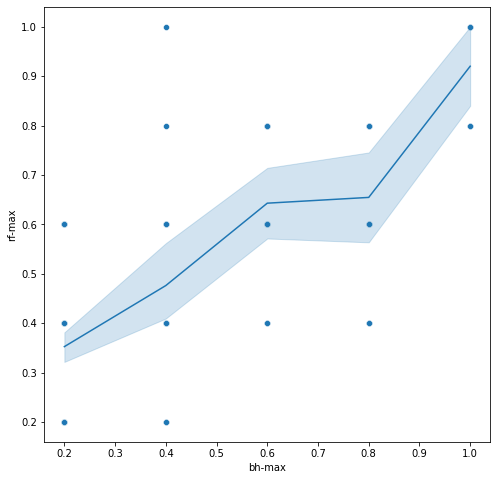

In [ ]:
plt.figure(figsize=(8,8))

sns.scatterplot(data=new_file_corr,x='bh-max',y='rf-max')
sns.lineplot(data=new_file_corr,x='bh-max',y='rf-max')

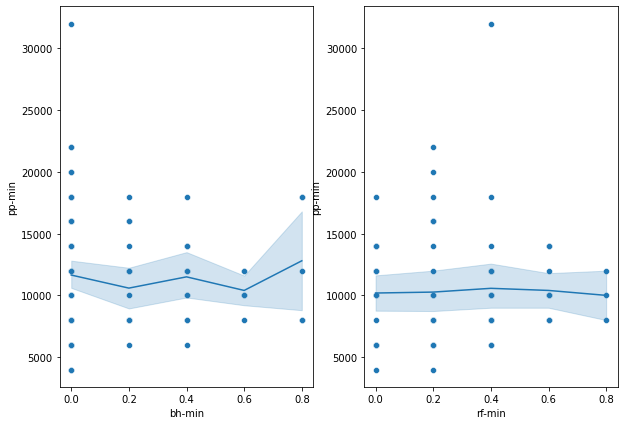

In [ ]:
#pp_min does not have any? strong relationship with bh_min & rf_min

fig,(a1,a2)=plt.subplots(1,2)
fig.set_size_inches(10,7)

sns.scatterplot(data=new_file_corr,x='bh-min',y='pp-min',ax=a1)
sns.lineplot(data=new_file_corr,x='bh-min',y='pp-min',ax=a1)

sns.scatterplot(data=new_file_corr,x='rf-min',y='pp-min',ax=a2)
sns.lineplot(data=new_file_corr,x='rf-min',y='pp-min',ax=a2)

Text(0.5, 1.0, 'Districts per State Distribution')

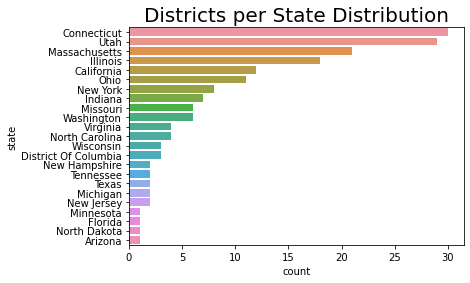

In [ ]:
# plt.figure(figsize=(16,10))
sns.countplot(y=new_file['state'],order=new_file['state'].value_counts().index)
plt.title("Districts per State Distribution",size=20)

Text(0.5, 1.0, 'Locale Distribution')

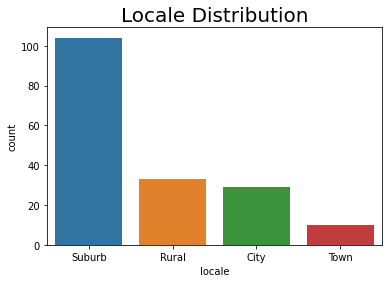

In [ ]:
#Locale distribution data was unevenly collected, Most of the data is concentrated in the suburb or the city 음
# plt.figure(figsize=(16,10))
sns.countplot(x=new_file['locale'])
plt.title('Locale Distribution',fontsize=20)

In [ ]:
engagement_df['MM']=pd.to_datetime(engagement_df['time']).dt.month
engagement_df.head()

,time,lp_id,pct_access,engagement_index,district_id,MM
0,2020-01-01,28525.0,0.05,0.47,1324,1
1,2020-01-01,83862.0,0.00,NaN,1324,1
2,2020-01-01,85836.0,0.00,NaN,1324,1
3,2020-01-01,57343.0,0.00,NaN,1324,1
4,2020-01-01,91165.0,0.00,NaN,1324,1


In [ ]:
eng_pivot=pd.pivot_table(data=engagement_df,index='MM',values=['pct_access','engagement_index'],aggfunc=np.mean).reset_index()
eng_pivot

,MM,engagement_index,pct_access
0,1,107.032540,0.658594
1,2,154.539105,0.612505
2,3,190.751239,0.518599
3,4,203.635251,0.539946
4,5,166.453779,0.470723
5,6,97.503382,0.242586
6,7,39.134103,0.083711
7,8,119.633864,0.246988
8,9,217.289856,0.611457
9,10,208.898160,0.624348


Text(0.5, 1.0, 'trend of engagement index over time from January 2020 to December 2020')

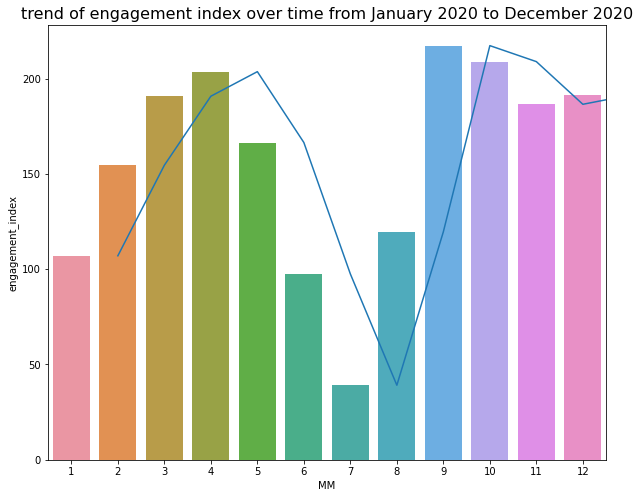

In [ ]:
plt.figure(figsize=(10,8))
sns.lineplot(data=eng_pivot,x='MM',y='engagement_index')
sns.barplot(data=eng_pivot,x='MM',y='engagement_index')
plt.title('trend of engagement index over time from January 2020 to December 2020',fontsize=16)

In [ ]:
#1월--코로나 전에 어떤 district가 대체로 online 상품을 많이 활용했나? 그지역 특징 조사해보기

**April**

In [ ]:
April_df=engagement_df[engagement_df['MM']==4]

In [ ]:
new_id_li=new_file['district_id'].unique()

In [ ]:
districts=[]
Eng_Level=[]
for i in new_id_li:
  eng_level= April_df.loc[April_df['district_id']==i,'engagement_index'].mean()
  districts.append(i)
  Eng_Level.append(eng_level)

In [ ]:
April_eng_data={'district_id':districts,'April_Eng_Level_mean':Eng_Level}
April_df=pd.DataFrame(April_eng_data)

In [ ]:
April_df.head()
April_df=April_df.dropna()
April_df

,district_id,April_Eng_Level_mean
0,1000,198.639486
1,1044,120.345777
2,1052,264.609407
3,1142,799.329549
4,1204,207.272446
...,...,...
171,9589,209.018143
172,9778,67.032451
173,9812,63.918478
174,9899,400.373097


In [ ]:
# research about the outlier(2개는 따로 research)
April_df=April_df.sort_values(by='April_Eng_Level_mean',ascending=False)
#district 9536: 2500, district 3692: 1137

In [ ]:
# 나머지 10%
#top 10% districts that used online products well even during the start of the pandemic but deleted the 2 outlier districts
adjust_well_10=[]
for i in April_df['district_id'][2:17]:
  adjust_well_10.append(i)

In [ ]:
#least 10% districts that used online products well even during the start of the pandemic
adjust_bad_10=[]
for i in April_df['district_id'].tail(15):
  adjust_bad_10.append(i)

In [ ]:
adj_well_bool=district_general_df['district_id'].isin(adjust_well_10)
adj_well_info_df=district_general_df[adj_well_bool]
adj_well_info_df=adj_well_info_df.sort_values(by='district_id')

In [ ]:
adj_well_info_df_copy=adj_well_info_df.copy()
adj_well_info_df=pd.merge(April_df,adj_well_info_df,on='district_id')
adj_well_info_df

,district_id,April_Eng_Level_mean,state,locale,bh-min,bh-max,rf-min,rf-max,rat-min,rat-max,pp-min,pp-max,City,Rural,Suburb,Town
0,1142,799.329549,Connecticut,Rural,0.0,0.2,0.2,0.4,0.18,1.0,NaN,NaN,0,1,0,0
1,1904,747.183490,Connecticut,Rural,0.0,0.2,0.0,0.2,0.18,1.0,NaN,NaN,0,1,0,0
2,6055,742.234602,Connecticut,Rural,0.0,0.2,0.0,0.2,0.18,1.0,NaN,NaN,0,1,0,0
3,5600,737.852223,Utah,Suburb,0.0,0.2,0.2,0.4,0.18,1.0,6000.0,8000.0,0,0,1,0
4,2321,718.223425,California,Rural,0.0,0.2,0.0,0.2,0.18,1.0,NaN,NaN,0,1,0,0
5,1444,706.125250,Connecticut,Suburb,0.0,0.2,0.4,0.6,0.18,1.0,NaN,NaN,0,0,1,0
6,3248,678.396446,Illinois,Suburb,0.6,0.8,0.6,0.8,0.18,1.0,12000.0,14000.0,0,0,1,0
7,7798,677.412491,New York,Rural,0.0,0.2,0.2,0.4,0.18,1.0,22000.0,24000.0,0,1,0,0
8,9007,670.404563,Arizona,City,0.8,1.0,NaN,NaN,0.18,1.0,NaN,NaN,1,0,0,0
9,2257,658.743923,New York,Rural,0.0,0.2,0.2,0.4,NaN,NaN,20000.0,22000.0,0,1,0,0


In [ ]:
adj_bad_bool=district_general_df['district_id'].isin(adjust_bad_10)
adj_bad_info_df=district_general_df[adj_bad_bool]
adj_bad_info_df=pd.merge(April_df,adj_bad_info_df,on='district_id')
adj_bad_info_df

,district_id,April_Eng_Level_mean,state,locale,bh-min,bh-max,rf-min,rf-max,rat-min,rat-max,pp-min,pp-max,City,Rural,Suburb,Town
0,6144,39.436807,Michigan,Suburb,0.4,0.6,0.6,0.8,0.18,1.0,10000.0,12000.0,0,0,1,0
1,7975,36.574344,California,City,0.6,0.8,0.6,0.8,0.18,1.0,NaN,NaN,1,0,0,0
2,7164,34.757117,California,City,0.6,0.8,0.6,0.8,0.18,1.0,NaN,NaN,1,0,0,0
3,6584,34.598271,North Carolina,Rural,0.4,0.6,0.6,0.8,0.18,1.0,8000.0,10000.0,0,1,0,0
4,3160,26.947627,Utah,Suburb,0.0,0.2,0.2,0.4,0.18,1.0,8000.0,10000.0,0,0,1,0
5,1791,18.002300,Virginia,City,0.6,0.8,0.6,0.8,NaN,NaN,10000.0,12000.0,1,0,0,0
6,6640,12.573632,Tennessee,Suburb,0.0,0.2,NaN,NaN,0.18,1.0,8000.0,10000.0,0,0,1,0
7,3732,11.718012,Michigan,Suburb,0.4,0.6,0.4,0.6,0.18,1.0,12000.0,14000.0,0,0,1,0
8,7177,3.731011,North Carolina,Suburb,0.2,0.4,0.2,0.4,0.18,1.0,8000.0,10000.0,0,0,1,0
9,2567,3.228211,Washington,Suburb,0.0,0.2,0.2,0.4,0.18,1.0,12000.0,14000.0,0,0,1,0


In [ ]:
adj_well_info_df_copy=adj_well_info_df.copy()
subset=['City', 'Rural','Suburb', 'Town','bh-min','rf-min','rat-min', 'rat-max', 'pp-min']
adj_well_info_df_copy=adj_well_info_df_copy.drop(columns=subset)
adj_well_info_df_copy

,district_id,April_Eng_Level_mean,state,locale,bh-max,rf-max,pp-max
0,1142,799.329549,Connecticut,Rural,0.2,0.4,NaN
1,1904,747.183490,Connecticut,Rural,0.2,0.2,NaN
2,6055,742.234602,Connecticut,Rural,0.2,0.2,NaN
3,5600,737.852223,Utah,Suburb,0.2,0.4,8000.0
4,2321,718.223425,California,Rural,0.2,0.2,NaN
5,1444,706.125250,Connecticut,Suburb,0.2,0.6,NaN
6,3248,678.396446,Illinois,Suburb,0.8,0.8,14000.0
7,7798,677.412491,New York,Rural,0.2,0.4,24000.0
8,9007,670.404563,Arizona,City,1.0,NaN,NaN
9,2257,658.743923,New York,Rural,0.2,0.4,22000.0


In [ ]:
adj_bad_info_df_copy=adj_bad_info_df.copy()
subset=['City', 'Rural','Suburb', 'Town','bh-min','rf-min','rat-min', 'rat-max', 'pp-min']
adj_bad_info_df_copy=adj_bad_info_df_copy.drop(columns=subset)
adj_bad_info_df_copy


,district_id,April_Eng_Level_mean,state,locale,bh-max,rf-max,pp-max
0,6144,39.436807,Michigan,Suburb,0.6,0.8,12000.0
1,7975,36.574344,California,City,0.8,0.8,NaN
2,7164,34.757117,California,City,0.8,0.8,NaN
3,6584,34.598271,North Carolina,Rural,0.6,0.8,10000.0
4,3160,26.947627,Utah,Suburb,0.2,0.4,10000.0
5,1791,18.002300,Virginia,City,0.8,0.8,12000.0
6,6640,12.573632,Tennessee,Suburb,0.2,NaN,10000.0
7,3732,11.718012,Michigan,Suburb,0.6,0.6,14000.0
8,7177,3.731011,North Carolina,Suburb,0.4,0.4,10000.0
9,2567,3.228211,Washington,Suburb,0.2,0.4,14000.0


In [ ]:
adjust_merge_df=pd.concat([adj_well_info_df_copy,adj_bad_info_df_copy])

In [ ]:
adjust_merge_df

,district_id,April_Eng_Level_mean,state,locale,bh-max,rf-max,pp-max
0,1142,799.329549,Connecticut,Rural,0.2,0.4,NaN
1,1904,747.183490,Connecticut,Rural,0.2,0.2,NaN
2,6055,742.234602,Connecticut,Rural,0.2,0.2,NaN
3,5600,737.852223,Utah,Suburb,0.2,0.4,8000.0
4,2321,718.223425,California,Rural,0.2,0.2,NaN
5,1444,706.125250,Connecticut,Suburb,0.2,0.6,NaN
6,3248,678.396446,Illinois,Suburb,0.8,0.8,14000.0
7,7798,677.412491,New York,Rural,0.2,0.4,24000.0
8,9007,670.404563,Arizona,City,1.0,NaN,NaN
9,2257,658.743923,New York,Rural,0.2,0.4,22000.0


In [ ]:
adjust_merge_df.loc[adjust_merge_df['district_id'].isin(adjust_well_10),'adj_well']=True
adjust_merge_df.loc[adjust_merge_df['district_id'].isin(adjust_bad_10),'adj_well']=False

In [ ]:
adjust_merge_df.head()

,district_id,April_Eng_Level_mean,state,locale,bh-max,rf-max,pp-max,adj_well
0,1142,799.329549,Connecticut,Rural,0.2,0.4,NaN,True
1,1904,747.183490,Connecticut,Rural,0.2,0.2,NaN,True
2,6055,742.234602,Connecticut,Rural,0.2,0.2,NaN,True
3,5600,737.852223,Utah,Suburb,0.2,0.4,8000.0,True
4,2321,718.223425,California,Rural,0.2,0.2,NaN,True


**visualization to compare the 2 groups**

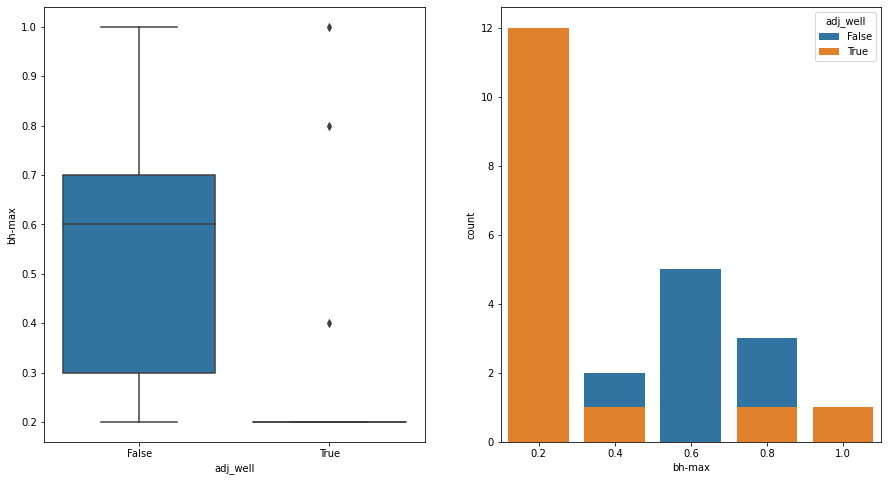

In [ ]:
figure,(a1,a2)=plt.subplots(nrows=1,ncols=2)
figure.set_size_inches(15,8)
sns.boxplot(data=adjust_merge_df,y='bh-max',x='adj_well',ax=a1)
sns.countplot(data=adjust_merge_df,hue='adj_well',x='bh-max',dodge=False,ax=a2)
# plt.ylim(0,15)

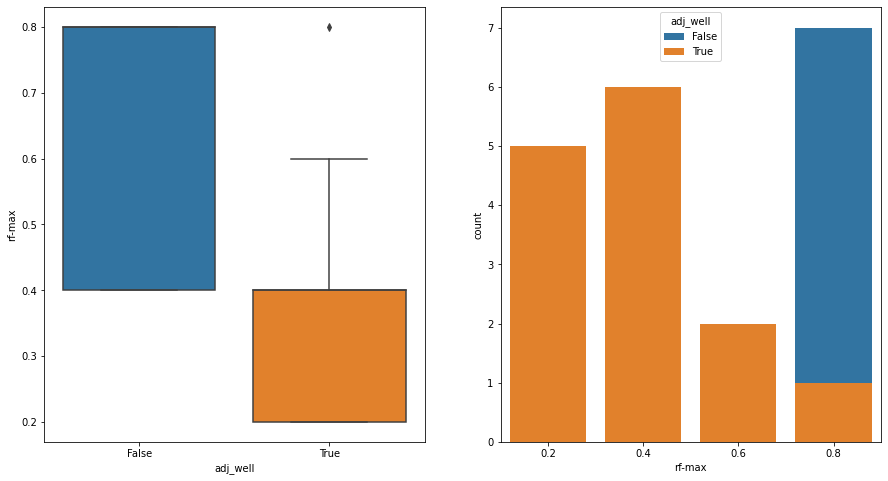

In [ ]:
#rf-max comparison
figure,(a1,a2)=plt.subplots(nrows=1,ncols=2)
figure.set_size_inches(15,8)
sns.boxplot(data=adjust_merge_df,y='rf-max',x='adj_well',ax=a1)
sns.countplot(data=adjust_merge_df,hue='adj_well',x='rf-max',dodge=False,ax=a2)

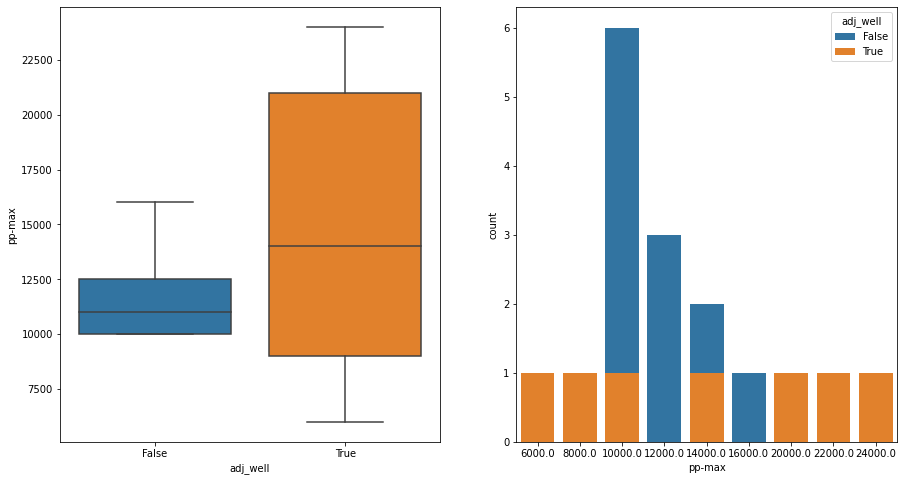

In [ ]:
#pp-max comparison
figure,(a1,a2)=plt.subplots(nrows=1,ncols=2)
figure.set_size_inches(15,8)
sns.boxplot(data=adjust_merge_df,y='pp-max',x='adj_well',ax=a1)
sns.countplot(data=adjust_merge_df,hue='adj_well',x='pp-max',dodge=False,ax=a2)

**product useage difference**

In [ ]:
path='/content/drive/Shareddrives/E-Learning/Data/engagement_data/'
adj_well_nunique=[]
for i in adjust_well_10:
  filename=path+i+'.csv'
  product_num=pd.read_csv(filename)['lp_id'].nunique()
  adj_well_nunique.append(product_num)

In [ ]:
well_district_product={'Districts':adjust_well_10,'product_num':adj_well_nunique}
pd.DataFrame(well_district_product)

,Districts,product_num
0,1142,1294
1,1904,2200
2,6055,1561
3,5600,696
4,2321,1948
5,1444,1500
6,3248,2058
7,7798,2158
8,9007,1355
9,2257,1884


In [ ]:
path='/content/drive/Shareddrives/E-Learning/Data/engagement_data/'
adj_bad_nunique=[]
for i in adjust_bad_10:
  filename=path+i+'.csv'
  product_num=pd.read_csv(filename)['lp_id'].nunique()
  adj_bad_nunique.append(product_num)

In [ ]:
bad_district_product={'Districts':adjust_bad_10,'product_num':adj_bad_nunique}
pd.DataFrame(bad_district_product)

,Districts,product_num
0,6144,2731
1,7975,2716
2,7164,4530
3,6584,3508
4,3160,3853
5,1791,4602
6,6640,4345
7,3732,3169
8,7177,4913
9,2567,2874


[(0.0, 6000.0)]

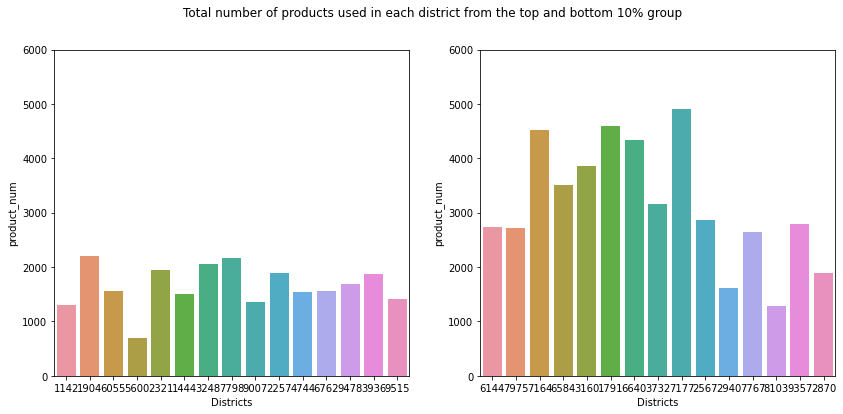

In [ ]:
figure,(a1,a2)=plt.subplots(nrows=1,ncols=2)
figure.set_size_inches(14,6)
figure.suptitle('Total number of products used in each district from the top and bottom 10% group')

a=sns.barplot(data=pd.DataFrame(well_district_product),x='Districts',y='product_num',ax=a1)
a.set(ylim=(0,6000))

b=sns.barplot(data=pd.DataFrame(bad_district_product),x='Districts',y='product_num',ax=a2)
b.set(ylim=(0,6000))

In [ ]:
adjust_well_10

['1142',
 '1904',
 '6055',
 '5600',
 '2321',
 '1444',
 '3248',
 '7798',
 '9007',
 '2257',
 '4744',
 '6762',
 '9478',
 '3936',
 '9515']

In [ ]:
products_info_df=products_info.copy()
products_info_df=products_info_df.drop(columns=['url'])

In [ ]:
path='/content/drive/Shareddrives/E-Learning/Data/engagement_data/'
li=[]

for i in adjust_well_10:
  filename=path+i+'.csv'
  district=pd.read_csv(filename)
  pivot_table=pd.pivot_table(data=district,index='lp_id',values=['pct_access','engagement_index'],aggfunc=np.mean).sort_values(by='pct_access',ascending=False).reset_index()
  df=pd.merge(pivot_table,products_info_df,on='lp_id').head(10)
  df['district_id']=i
  li.append(df)

adj_well_products=pd.concat(li)
adj_well_products

,lp_id,engagement_index,pct_access,product name,provider/company name,sector(s),primary essential function,district_id
0,32213.0,4529.322849,22.519600,Google Classroom,Google LLC,PreK-12; Higher Ed; Corporate,SDO - Learning Management Systems (LMS),1142
1,95731.0,9234.881384,18.820437,Google Docs,Google LLC,PreK-12; Higher Ed; Corporate,LC - Content Creation & Curation,1142
2,99916.0,991.060863,13.769068,Google Drive,Google LLC,PreK-12; Higher Ed; Corporate,LC/CM/SDO - Other,1142
3,61292.0,2220.850657,6.298586,YouTube,Google LLC,PreK-12; Higher Ed; Corporate,"LC - Sites, Resources & Reference - Streaming ...",1142
4,98845.0,1844.799074,6.147965,Meet,Google LLC,PreK-12; Higher Ed; Corporate,CM - Virtual Classroom - Video Conferencing & ...,1142
...,...,...,...,...,...,...,...,...
5,99916.0,708.553896,7.548221,Google Drive,Google LLC,PreK-12; Higher Ed; Corporate,LC/CM/SDO - Other,9515
6,33185.0,1116.594697,6.734058,Google Forms,Google LLC,PreK-12; Higher Ed; Corporate,CM - Classroom Engagement & Instruction - Asse...,9515
7,20069.0,2599.355298,6.324451,Schoology,Schoology,PreK-12,SDO - Learning Management Systems (LMS),9515
8,98845.0,867.535745,5.202260,Meet,Google LLC,PreK-12; Higher Ed; Corporate,CM - Virtual Classroom - Video Conferencing & ...,9515


In [ ]:
path='/content/drive/Shareddrives/E-Learning/Data/engagement_data/'
li=[]

for i in adjust_bad_10:
  filename=path+i+'.csv'
  district=pd.read_csv(filename)
  pivot_table=pd.pivot_table(data=district,index='lp_id',values=['pct_access','engagement_index'],aggfunc=np.mean).sort_values(by='pct_access',ascending=False).reset_index()
  df=pd.merge(pivot_table,products_info_df,on='lp_id').head(10)
  df['district_id']=i
  li.append(df)

adj_bad_products=pd.concat(li)
adj_bad_products

,lp_id,engagement_index,pct_access,product name,provider/company name,sector(s),primary essential function,district_id
0,32213.0,3545.299890,11.886749,Google Classroom,Google LLC,PreK-12; Higher Ed; Corporate,SDO - Learning Management Systems (LMS),6144
1,98845.0,4879.895566,10.214494,Meet,Google LLC,PreK-12; Higher Ed; Corporate,CM - Virtual Classroom - Video Conferencing & ...,6144
2,95731.0,2867.653040,5.649262,Google Docs,Google LLC,PreK-12; Higher Ed; Corporate,LC - Content Creation & Curation,6144
3,61292.0,2265.343131,4.349343,YouTube,Google LLC,PreK-12; Higher Ed; Corporate,"LC - Sites, Resources & Reference - Streaming ...",6144
4,40928.0,768.544518,4.201250,Pear Deck,Pear Deck,PreK-12,LC - Digital Learning Platforms,6144
...,...,...,...,...,...,...,...,...
5,91165.0,360.615854,2.970000,MobyMax,MobyMax,PreK-12,LC - Digital Learning Platforms,2870
6,33185.0,580.125175,2.363125,Google Forms,Google LLC,PreK-12; Higher Ed; Corporate,CM - Classroom Engagement & Instruction - Asse...,2870
7,92871.0,137.083468,1.914703,PowerSchool,PowerSchool Group LLC,PreK-12; Higher Ed; Corporate,"SDO - Data, Analytics & Reporting - Student In...",2870
8,98265.0,269.989512,1.497016,Quizlet,Quizlet,PreK-12,LC - Study Tools,2870


In [ ]:
adj_well_products['product name'].value_counts()

Google Docs                      15
Google Classroom                 14
Google Drive                     14
YouTube                          12
Google Forms                     11
Meet                             10
Zoom                              6
i-Ready                           5
Google Sites                      5
Edpuzzle                          4
CoolMath Games                    2
ClassLink                         2
Freckle by Renaissance            2
Google Hangouts                   2
Edpuzzle - Free (Basic Plan)      2
ABCya!                            2
Nearpod                           2
Lexia Core5 Reading               2
Kahoot!                           2
Teach TCI                         2
ConnectED                         2
McGraw-Hill Education             2
Canvas                            2
Big Ideas Math                    2
IXL                               2
Google Sheets                     1
Blindside Networks                1
Seesaw : The Learning Journa

In [ ]:
adj_bad_products['product name'].value_counts()

Google Docs                         14
Clever                              13
Google Classroom                    12
Google Drive                        12
Google Forms                        11
YouTube                             11
Meet                                 6
Google Sites                         5
i-Ready                              5
Canvas                               5
Epic! - Unlimited Books for Kids     4
Zoom                                 4
PowerSchool                          4
CoolMath Games                       3
Seesaw : The Learning Journal        3
Nearpod                              3
Quizlet                              3
Prodigy                              3
Savvas Realize                       3
ExploreLearning Gizmos               2
Renaissance Learning                 2
MobyMax                              2
Lexia Core5 Reading                  2
ClassLink                            1
DreamBox                             1
Think Central            

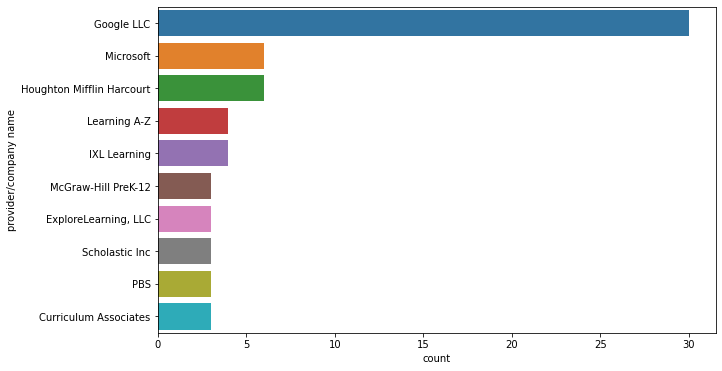

In [ ]:
plt.figure(figsize = (10,6))
sns.countplot(data=products_info, y="provider/company name", order=products_info['provider/company name'].value_counts().index[:10])

Text(0.5, 1.0, 'Distribution of Primary Essential Function of Platform in 2020')

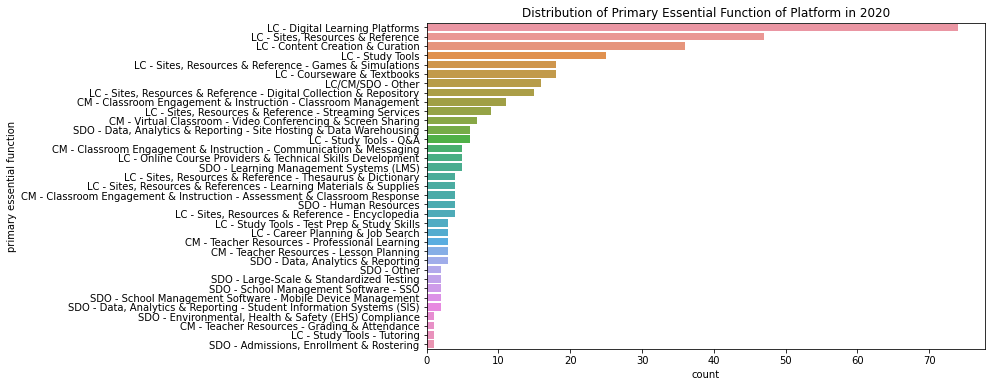

In [ ]:
plt.figure(figsize = (10,6))

sns.countplot(data=products_info, y="primary essential function", order=products_info['primary essential function'].value_counts().index[:])
plt.title('Distribution of Primary Essential Function of Platform in 2020')